## Association Rule Mining - Data Mining


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import StandardScaler  # z-score / standardization
from sklearn.preprocessing import MinMaxScaler # min max
from apyori import apriori

sns.set()
%matplotlib inline

In [2]:
#read csv file
df = pd.read_csv('oridataset.csv')
display(df)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


## Data Exploration

In [3]:
#statistics summary
print(df.describe())

                1           2           3           4           5           6  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.620690    1.600000    1.944828    3.572414    1.662069    1.600000   
std      0.613154    0.491596    0.537216    0.805750    0.474644    0.491596   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    3.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    4.000000    2.000000    2.000000   
max      3.000000    2.000000    3.000000    5.000000    2.000000    2.000000   

                7           8           9          10  ...          23  \
count  145.000000  145.000000  145.000000  145.000000  ...  145.000000   
mean     1.579310    1.627586    1.620690    1.731034  ...    1.337931   
std      0.495381    1.020245    1.061112    0.7

In [4]:
#check data types
df.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

In [5]:
print(df.isnull().sum())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64


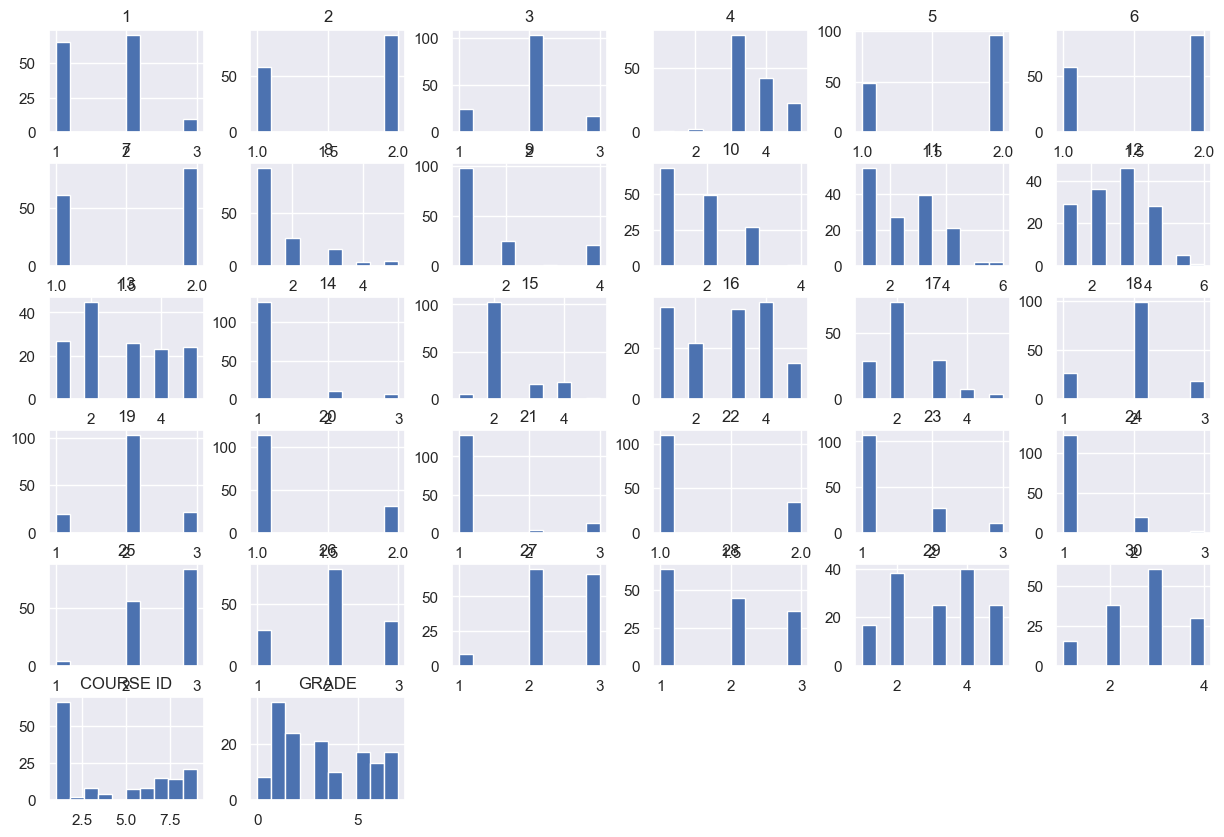

In [6]:
df.hist(figsize=(15, 10))
plt.show()

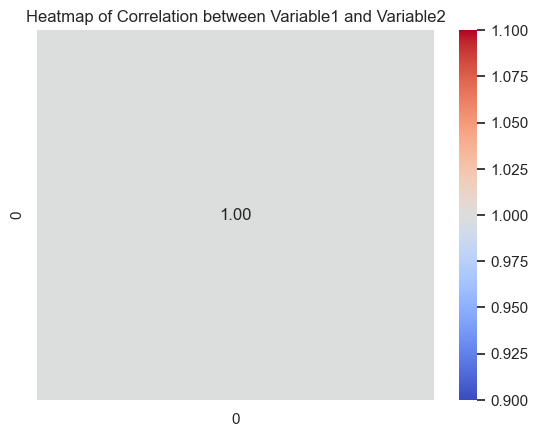

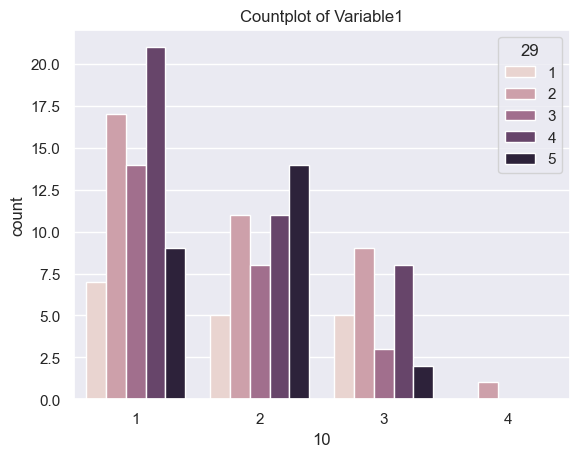

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

col1 = ['10','29']
df1 = pd.DataFrame(col1)

# Create a heatmap
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation between Variable1 and Variable2')
plt.show()

# Create a countplot
sns.countplot(x=df['10'],hue=df['29'], data=df1)
plt.title('Countplot of Accommodation Type and CGPA')
plt.show()


### Boxplot

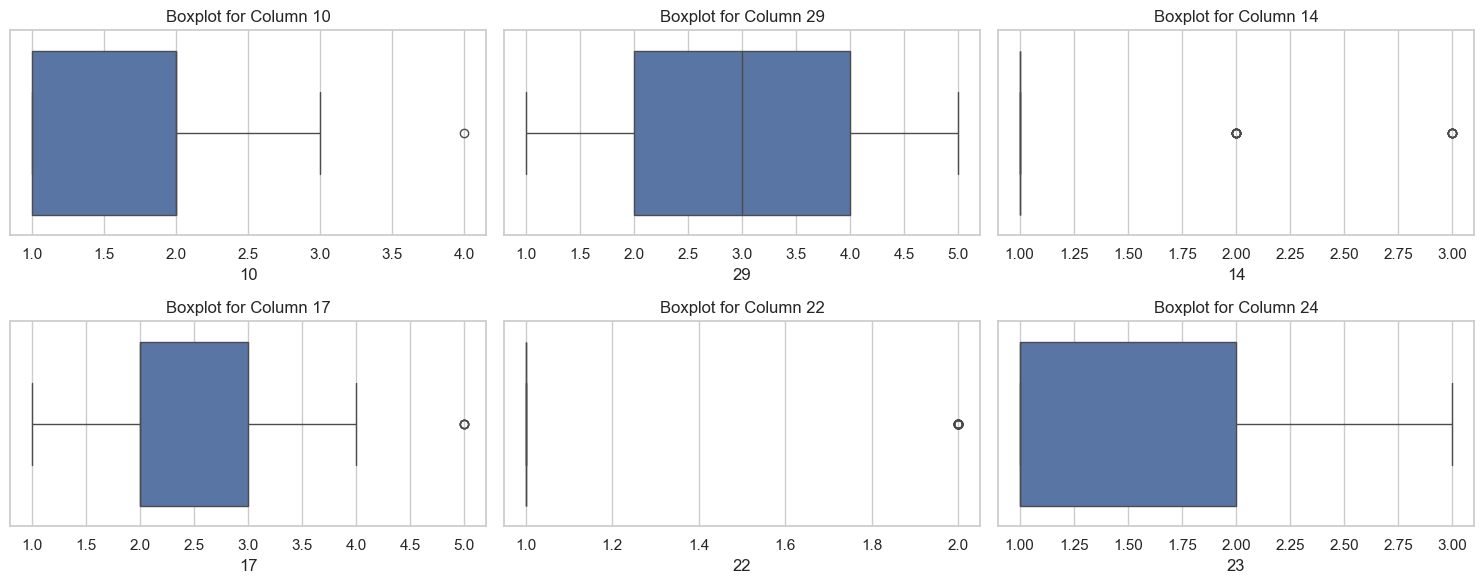

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 6))  

sns.boxplot(x='10', data=dum_df, ax=axes[0, 0])  
axes[0, 0].set_title('Boxplot for Column 10')
sns.boxplot(x='29', data=dum_df, ax=axes[0, 1])  
axes[0, 1].set_title('Boxplot for Column 29')
sns.boxplot(x='14', data=dum_df, ax=axes[0, 2]) 
axes[0, 2].set_title('Boxplot for Column 14')

sns.boxplot(x='17', data=dum_df, ax=axes[1, 0])  
axes[1, 0].set_title('Boxplot for Column 17')
sns.boxplot(x='22', data=dum_df, ax=axes[1, 1])  
axes[1, 1].set_title('Boxplot for Column 22')
sns.boxplot(x='23', data=dum_df, ax=axes[1, 2])  
axes[1, 2].set_title('Boxplot for Column 24')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [ ]:
#check null value
print(df.isnull().sum())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64


### Transformation

In [ ]:
#change column name
colname_mapping = {
    '1': 'Student_Age','2': 'Sex','3': 'Grad_High_Sch_Type',
    '4': 'Scholar_Type','5': 'Additional_work',
    '6': 'Reg_Or_Sport','7': 'Partner',
    '8': 'Total_Salary','9': 'Transport',
    '10': 'Accommodation_Type','11': 'Mother_Edu',
    '12': 'Father_Edu','13': 'Siblings',
    '14': 'Parental_Status','15': 'Mother_Occupation',
    '16': 'Father_Occupation', '17': 'Weekly_Study',
    '18': 'RF_NonScientific', '19': 'RF_Scientific',
    '20': 'Attend_Seminar', '21': 'Impact_Project',
    '22': 'Attend_Class', '23': 'Pre_Midterm_Companion',
    '24': 'Pre_Midterm_Timeline', '25': 'Take_Note',
    '26': 'Listen_Class', '27': 'Discussion',
    '28': 'Flip_Class', '29': 'CGPA',
    '30': 'Expect_CGPA'
}

new_df = df.copy()
new_df.rename(columns=colname_mapping, inplace=True)
display(new_df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
final_df = new_df.copy()

final_df['Student_Age'] = final_df['Student_Age'].map({1: '18-21', 2: '22-25', 3: 'above 26'})
final_df['Sex'] = final_df['Sex'].map({1: 'female', 2: 'male'})
final_df['Grad_High_Sch_Type'] = final_df['Grad_High_Sch_Type'].map({1: 'private', 2: 'state', 3: 'other'})
final_df['Scholar_Type'] = final_df['Scholar_Type'].map({1: 'None', 2: '25%', 3: '50%',4: '75%',5: 'Full'})
final_df['Additional_work'] = final_df['Additional_work'].map({1: 'Yes', 2: 'No'})
final_df['Reg_Or_Sport'] = final_df['Reg_Or_Sport'].map({1: 'Yes', 2: 'No'})
final_df['Partner'] = final_df['Partner'].map({1: 'Yes', 2: 'No'})
final_df['Total_Salary'] = final_df['Total_Salary'].map({1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410',5: 'above 410'})
final_df['Accommodation_Type'] = final_df['Accommodation_Type'].map({1: 'rental', 2: 'dormitory', 3: 'with family', 4: 'Other'})
final_df['Mother_Edu'] = final_df['Mother_Edu'].map({1: 'primary school', 2: 'secondary school', 3: 'high school', 4:'university', 5:'MSc.',6:'Ph.D.'})
final_df['Father_Edu'] = final_df['Father_Edu'].map({1: 'primary school', 2: 'secondary school', 3: 'high school', 4:'university', 5:'MSc.',6:'Ph.D.'})
final_df['Siblings'] = final_df['Siblings'].map({1: '1', 2: '2', 3:'3',4:'4',5:'5 or above'})
final_df['Parental_Status'] = final_df['Parental_Status'].map({1: 'married', 2: 'divorced',3:'died - one of them or both'})
final_df['Mother_Occupation'] = final_df['Mother_Occupation'].map({1: 'retired', 2: 'housewife',3:'government officer',4:'private sector employee',5:'self-employment',6:'other'})
final_df['Father_Occupation'] = final_df['Father_Occupation'].map({1: 'retired', 2: 'housewife',3:'government officer',4:'private sector employee',5:'self-employment',6:'other'})
final_df['Weekly_Study'] = final_df['Partner'].map({1: 'None', 2: '<5 hours',3:'6-10 hourse',4:'11-20 hours',5:'more than 20 hours'})
final_df['RF_NonScientific'] = final_df['RF_NonScientific'].map({1: 'None', 2: 'Sometimes', 3:'Often'})
final_df['RF_Scientific'] = final_df['RF_Scientific'].map({1: 'None', 2: 'Sometimes', 3:'Often'})
final_df['Attend_Seminar'] = final_df['Attend_Seminar'].map({1: 'Yes', 2: 'No'})
final_df['Impact_Project'] = final_df['Impact_Project'].map({1: 'positive', 2: 'negative',3:'netural'})
final_df['Attend_Class'] = final_df['Attend_Class'].map({1: 'always', 2: 'sometimes',3:'never'})
final_df['Pre_Midterm_Companion'] = final_df['Pre_Midterm_Companion'].map({1: 'alone', 2: 'with friends',3:'not applicable'})
final_df['Pre_Midterm_Timeline'] = final_df['Pre_Midterm_Timeline'].map({1: 'closest date to exam', 2: 'regularly during the semester',3:'never'})
final_df['Take_Note'] = final_df['Take_Note'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Listen_Class'] = final_df['Listen_Class'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Discussion'] = final_df['Discussion'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Flip_Class'] = final_df['Flip_Class'].map({1: 'not useful', 2: 'useful',3:'not applicable'})
final_df['CGPA'] = final_df['CGPA'].map({1: '< 2.00', 2: '2.00-2.49',3:'2.50-2.99',4:'3.00-3.49',5:'above 3.49'})
final_df['Expect_CGPA'] = final_df['Expect_CGPA'].map({1: '< 2.00', 2: '2.00-2.49',3:'2.50-2.99',4:'3.00-3.49',5:'above 3.49'})
final_df['GRADE'] = final_df['GRADE'].map({0:'Fail',1: 'DD', 2: 'DC',3:'CC',4:'CB',5:'BB',6:'BA',7:'AA'})

display(final_df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,22-25,male,other,50%,Yes,No,No,USD 135-200,1,...,alone,closest date to exam,always,sometimes,never,useful,< 2.00,< 2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,USD 135-200,1,...,alone,closest date to exam,always,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,USD 201-270,4,...,alone,closest date to exam,sometimes,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,USD 201-270,1,...,alone,regularly during the semester,always,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,USD 271-340,1,...,with friends,closest date to exam,sometimes,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,female,state,50%,Yes,Yes,No,USD 135-200,1,...,alone,closest date to exam,sometimes,never,sometimes,not useful,2.50-2.99,2.50-2.99,9,BB
141,STUDENT142,18-21,female,state,75%,No,No,No,USD 135-200,4,...,alone,closest date to exam,always,sometimes,sometimes,not useful,above 3.49,2.50-2.99,9,BB
142,STUDENT143,18-21,female,private,75%,No,No,No,USD 135-200,1,...,alone,closest date to exam,always,always,sometimes,not useful,3.00-3.49,2.50-2.99,9,DD
143,STUDENT144,22-25,female,state,75%,Yes,Yes,Yes,above 410,2,...,with friends,closest date to exam,sometimes,never,sometimes,not useful,above 3.49,2.50-2.99,9,CB


### Discretization

In [ ]:
col = ['Total_Salary','Accommodation_Type','Parental_Status','Weekly_Study','CGPA', 'GRADE']
newfinal_df = final_df[col].copy()
display(newfinal_df)

,Total_Salary,Accommodation_Type,Parental_Status,Weekly_Study,CGPA,GRADE
0,USD 135-200,rental,married,NaN,< 2.00,DD
1,USD 135-200,rental,married,NaN,2.00-2.49,DD
2,USD 201-270,dormitory,married,NaN,2.00-2.49,DD
3,USD 201-270,dormitory,married,NaN,2.50-2.99,DD
4,USD 271-340,Other,married,NaN,2.00-2.49,DD
...,...,...,...,...,...,...
140,USD 135-200,dormitory,divorced,NaN,2.50-2.99,BB
141,USD 135-200,dormitory,married,NaN,above 3.49,BB
142,USD 135-200,rental,married,NaN,3.00-3.49,DD
143,above 410,with family,married,NaN,above 3.49,CB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical variable
one_hot_encoded = encoder.fit_transform(final_df[['Parental_Status']]).toarray()

# Replace the original column with the one-hot encoded matrix
df_encoded = pd.concat([final_df, pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Parental_Status']))], axis=1)
df_encoded = df_encoded.drop(['Parental_Status'], axis=1)

display(df_encoded)


,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE,Parental_Status_died - one of them or both,Parental_Status_divorced,Parental_Status_married
0,STUDENT1,22-25,male,other,50%,Yes,No,No,USD 135-200,1,...,sometimes,never,useful,< 2.00,< 2.00,1,DD,0.0,0.0,1.0
1,STUDENT2,22-25,male,other,50%,Yes,No,No,USD 135-200,1,...,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD,0.0,0.0,1.0
2,STUDENT3,22-25,male,state,50%,No,No,No,USD 201-270,4,...,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD,0.0,0.0,1.0
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,USD 201-270,1,...,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD,0.0,0.0,1.0
4,STUDENT5,22-25,male,private,50%,No,No,Yes,USD 271-340,1,...,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,female,state,50%,Yes,Yes,No,USD 135-200,1,...,never,sometimes,not useful,2.50-2.99,2.50-2.99,9,BB,0.0,1.0,0.0
141,STUDENT142,18-21,female,state,75%,No,No,No,USD 135-200,4,...,sometimes,sometimes,not useful,above 3.49,2.50-2.99,9,BB,0.0,0.0,1.0
142,STUDENT143,18-21,female,private,75%,No,No,No,USD 135-200,1,...,always,sometimes,not useful,3.00-3.49,2.50-2.99,9,DD,0.0,0.0,1.0
143,STUDENT144,22-25,female,state,75%,Yes,Yes,Yes,above 410,2,...,never,sometimes,not useful,above 3.49,2.50-2.99,9,CB,0.0,0.0,1.0


In [ ]:
# #Weekly Study Hours: If None(0) or <5 hours(1), then 0. else is 1.
# final_df['Weekly_Study'] = final_df['Weekly_Study'].map(lambda x: 0 if x <= 2 else 1)

# #Parental Status: If Divorced(2) or Died(3), then 0, else is 1.
# final_df['Parental_Status'] = final_df['Parental_Status'].map(lambda x: 1 if x <= 1 else 0)

# #Total Salary: If <USD340, then 0, else 1.
# final_df['Total_Salary'] = final_df['Total_Salary'].map(lambda x: 0 if x <= 3 else 1)

# #CGPA: If <=2.99 then 0, else 1.
# final_df['CGPA'] = final_df['CGPA'].map(lambda x: 0 if x <= 3 else 1)

# #Grade: If grade <=C, then 0, else 1
# final_df['GRADE'] = final_df['GRADE'].map(lambda x: 0 if x <= 3 else 1)

In [ ]:
# col_disc = ['Weekly_Study', 'Parental_Status', 'Total_Salary', 'CGPA', 'GRADE']

# # loop through each column and replace 0 with 'Low' and 1 with 'High'
# for column in col_disc:
#     final_df[column] = final_df[column].map({0: 'Low', 1: 'High'})

# display(final_df)

## Association Rule Mining

In [ ]:
# records = []
# for i in range(0, 145):
#     records.append([str(final_df.values[i,j]) for j in range(0, 20)])
# print(records)